In [34]:
import numpy as np
from matplotlib import colors


#读取rgb文件  :文件第一行必须是数据，且用空格隔开
#path = 'colormaps/ncar_ncl/3saw.rgb'

path = 'colormaps/ncar_ncl/ncl_default.rgb'
def ncl_default(path):
    '''
    func : 读取文件并返回rgb数组
    prame : path 对应rgb的文件
    return : (array[rgb] , len[n])
    '''
    file = open(path)
    data=file.readlines()
    n=len(data)
    rgb=np.zeros((n,3))
    for i in np.arange(n):
        rgb[i][0]=data[i].strip().split(' ')[0]
        rgb[i][1]=data[i].strip().split(' ')[1]
        rgb[i][2]=data[i].strip().split(' ')[2]
    file.close()
    return rgb ,n
# ncl_default(path)[0]
# ncl_default(path)[1]

254

In [ ]:
# 根据已知的rgb映射出一个改rgb的一个子集
def ncl_default_colors(l,rgb):
    '''
    func : 根据已知的rgb映射出一个改rgb的一个子集
    prame : l 用户自定义的含颜色索引的列表
    return : 根据用户定义后的列表返回对应的rgb
    '''
    n = len(l)
    colors = np.zeros((n,3))
    #print(n)
    for i in range(n):
        print(l[i],i)
        j = l[i]-2
        colors[i]=rgb[j]
    return colors

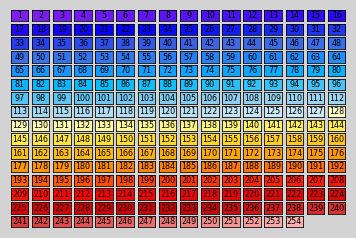

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
from matplotlib import cm, colors

class Colormap(colors.ListedColormap):
    def __init__(self, c, name='from_list', n=None):
        '''Initialization'''
        self._colors = c
        self._name = name
        self._N = n

        # call parent __init__
        super(Colormap, self).__init__(self._colors, name=self._name, N=self._N)

    def __getitem__(self, item):
        return Colormap(self._colors[item], name='sliced_' + self._name)

file = open('colormaps/ncar_ncl/ncl_default.rgb')
data=file.readlines()
n=len(data)
rgb=np.zeros((n,3))
for i in np.arange(n):
    rgb[i][0]=data[i].strip().split(' ')[0]
    rgb[i][1]=data[i].strip().split(' ')[1]
    rgb[i][2]=data[i].strip().split(' ')[2]
cmaps = Colormap(rgb)

mp.figure('Subplot A', facecolor='lightgray')

for i in range(254):
    a = np.outer(np.ones(10), np.arange(0, 1, 0.001))
    mp.subplot(16,16,i+1)
    mp.xticks([])
    mp.yticks([])
    mp.imshow(a, cmap=cmaps[i],aspect='auto',origin='lower')
    mp.text(500, 5, i+1, size=8, alpha=1,ha='center',va='center')
	
mp.show()